파이썬 머신러닝 완벽 가이드 ch8. 6, 8 ~ 9 pg. 512 ~ 516, 529 ~ 543

---

## 06 토픽 모델링(Topic Modeling) - 20 뉴스 그룹

`토픽 모델링`
- 문서 집합에 숨어있는 주제를 찾아내는 것
- `LSA`,`LDA` : 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법

토픽 모델링의 LDA와 차원 축소의 LDA는 다르다.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스. 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

# LDA는 Count기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features = 1000, min_df = 2, stop_words='english',
                             ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터
- 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링 수행
- n_component : 토픽 개수 조정

In [8]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- LatentDirichletAllocation.fit(데이터세트) 를 수행하면 LatentDirichletAllocation 객체는 components_ 속성값을 가지게 된다.

- components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있다.
-  높은 값일수록 해당 word 피처는 그 토픽의 중심 word 가 된다.

In [9]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- components_는 array[8,4000]으로 구성돼있다.
- 8개 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다.

In [10]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
    topic_word_indexed = topic.argsort()[::-1]
    top_indexes = topic_word_indexed[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- 명확하게 주제가 추출된 것도 있고 아닌 것도 있다.

## 08 문서 유사도

#### 문서 유사도 측정 방법 - 코사인 유사도

`코사인 유사도`
- 문서와 문서 간의 유사도 비교할 때 사용
- 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
- 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

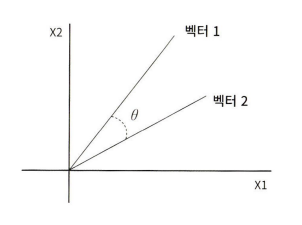

### 두 벡터 사잇각

두 벡터의 사잇각에 따라서 상호 관계는 유사하거나 관련이 없더나 아예 반대 관계가 될 수 있다.

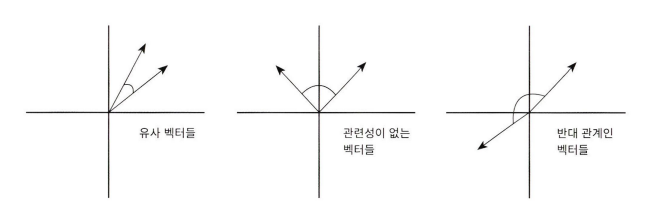

두 벡터 A와 B의 코사인 값
- 두 벡터 A와 B의 내적 값은 두 벡터의 크기를 곱한 값에 코사인 각도를 곱한 것
 - 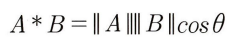

- 유사도 코사인세타는 다음과같이 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것
 - 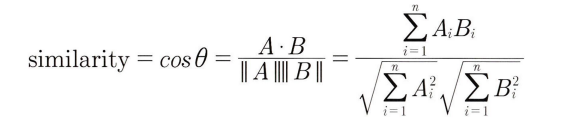

코사인 유사도가 문서 유사도 비교에 가장 많이 사용되는 이유
- 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉽다. 이러한 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어진다.
- 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교를 할 수 없다.

In [11]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

- cos_similarity 함수 : 두 개의 넘파이 배열에 대한 코사인 유사도를 구한다.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = [
    'if you take the blue pill, the story ends',
    'if you take the red pill, you stay in Wonderland',
    'if you take the red pill, I show you how deep the rabbit hole goes'
]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


- 반환된 행렬은 희소 행렬
- cos_similarity 함수의 인자인 array로 만들기 위해 밀집 행렬도 변환한 뒤, 다시 각각의 배열로 변환한다.

In [13]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫번째 문장과 두번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402078


In [14]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404250
문장 2, 문장 3 Cosine 유사도 : 0.456473


sklearn.metrics.pairwise.cosine_similarity API를 이용해 문사 유사도를 측정해보자

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- 1은 첫 번째 문서 자신에 대한 유사도 측정
- 제외하려면 비교 대사에서 [1:] 사용

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


cosine_similarity()는 쌍으로 코사인 유사도 값을 제공할 수 있다.

In [17]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


- cosine_similarity()의 반환 값은 (3,3)의 ndarray
- 1행: 1 & 1,2,3의 유사도
- 2행: 2 & 1,2,3의 유사도

### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [40]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
nltk.download('punkt')
nltk.download('wordnet')

path = '/content/drive/MyDrive/ESAA/24-1/자료/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df=pd.read_table(file_,index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words='english' , ngram_range=(1,2),
                             min_df=0.05, max_df=0.85)

tfidf_vect.fit(document_df['opinion_text'])
feature_vect = tfidf_vect.transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


호텔을 주제로 군집화된 문서 이용해 특정 문서와 다른 문서 간의 유사도 알아보기

- 문서를 피처 벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화
- cosine_similarity() 이용해 상호 비교해 유사도 확인

호텔을 주제로 군집화된 데이터 먼저 추출

-> 이 데이터에 해당하는 TfidVectoerier의 데이터 추출

-> 호텔 군집화 데이터를 기반으로 별도의 TF-IDF 벡터화 수행 x, 바로 위에서 TfidVectorizer로 만들어진 데이터에서 그대로 추출

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터임. DATAFRAME에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 dataframe index:',hotel_indexes)

# 호텔 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]["filename"]
print("##### 비교 기준 문서명 ", comparison_docname, ' 와 타문서 유사도 #####')

# document_df에서 추출한 index 객체를 feature_vect로 입력해 호텔 군집화된 feature-vect 추출
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 dataframe index: Index([3, 14, 15, 17, 20, 21, 25, 30, 33, 35, 37, 38, 39, 41, 48, 49], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타문서 유사도 #####
[[1.         0.0430688  0.03638665 0.06189595 0.05221059 0.06193118
  0.05846178 0.13989623 0.51442299 0.11742762 0.38038865 0.32619948
  0.11282857 0.1386783  0.09518068 0.07049362]]


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

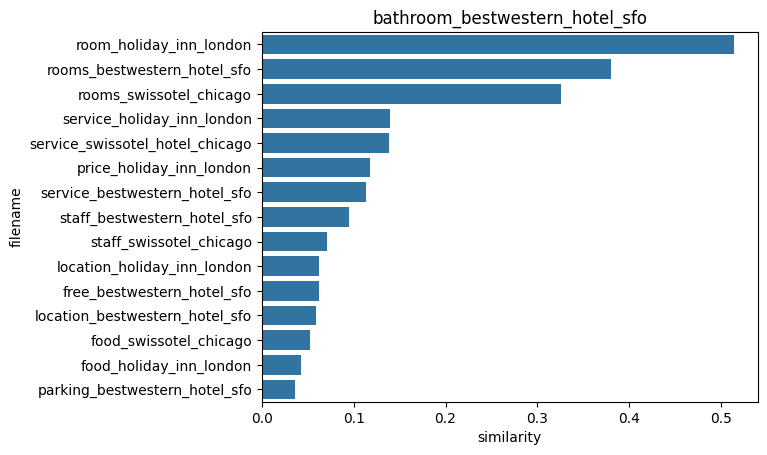

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

- 첫 번째 문서인 bathroom_bestwestern_hotel_sfo와 가장 비슷한 문서는 room_holiday_inn_lonon 이다.

## 09 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### 한글 NLP 처리의 어려움


일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어렵다

주된 원인 - '띄어쓰기'와 '다양한 조사'

1. 한글은 띄어쓰기를 잘못하면 의미가 왜곡되어 전달

2. 조사는 주어나 목적어를 위해 추가. 워낙 경우의 수가 많다 -> 전처리 시 제거하기가 까다롭다.

### KoNLPy 소개

`KoNLPy`
- 파이썬의 대표적인 한글 형태소 패키지
- 기존의 C/C++, Java로 잘 만들어진 한글 형태소 엔진을 파이썬 래퍼(Wrapper) 기반으로 재작성한 패키지
- 꼬꼬마(Kkma), 한나눔(Hannanum), Komoran, 은전한닢 프로젝트(Mecab), Twitter와 같이 5개의 형태소 분석 모듈 모두 사용 가능

`형태소` : 단어로서 의미를 가지는 최소 단위

`형태소 분석` : 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업


뛰어난 형태소 분석으로 인정받고 있는 Mecab의 경우 윈도우 환경에서는 구동x.

In [46]:
!pip install --upgrade pip
!pip install JPype1-1.4.0-cp310-cp310-win_amd64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: JPype1-1.4.0-cp310-cp310-win_amd64.whl is not a supported wheel on this platform.


In [47]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 32.9 MB/s eta 0:00:00


### 데이터 로딩

In [48]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA/24-1/자료/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


- 학습 데이터 세트의 0과 1의 Label 값 비율
 - 1이 긍정, 0이 부정 감성

In [49]:
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

- 균등한 분포

train_df의 경우 리뷰 텍스트를 가지는 'documnet' 칼럼에 Null 일부 존재해 공백으로 변환
- 문자가 아닌 숫자의 경우 단어적인 의미로 부족해 파이썬 정규 표현식 모듈인 re를 이용해 공백으로 변환
- 테스트 데이터 세트의 경우도 동일한 데이터 가공 수행

In [50]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA/24-1/자료/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

TF-IDF 방식으로 단어를 벡터화
- 각 문장을 한글 형태로 분석을 토해 형태소 단어로 토큰화
- 한글 형태소 에진은 SNS 분서게 적합한 Twitter 클래스를 이용
- Twitter 객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 혀태로 토큰화해 list 객체로 반환
- tw_Tokenizer() : 문장을 형태로 단어 형태로 변환하는 함수

In [51]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


사이킷런의 TfidVectorizer를 이용해 TF-IDF 피처 모델 생성

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


로지스틱 회귀를 이용해 분류 기반의 감성 분석 수행

In [53]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = {'C' : [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- C가 3.5일 때 최고 정확도를 보였다.

테스트 세트 이용해 최종 감성 분석 예측 수행

- 테스트 세트 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer 그대로 사용해야한다
- 그래야만 학습 시 설정된 TfidfVectorizer의 피처 개수와 테스트 데이터를 TfidfVectorizer로 변환할 피처 개수가 같아진다

In [54]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86186
